<a href="https://colab.research.google.com/github/anushkaroyc/datascience/blob/main/CustomerChurnPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the dataset from drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Step 2: Install Packages
#!pip install source /content/drive/MyDrive/colab_env/bin/activate;



In [ ]:
wwfrom google.colab import drive
import os
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Churn_Modelling1.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(folder_path)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

# **Data Cleaning**

In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Checking for unique values in each column
for row in data.columns:
  print(row,data[row].unique())


CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [ ]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [ ]:
data['Gender'].head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [ ]:
# Creating a dummy dataset for One hot encoding (Geography)
new_data = pd.get_dummies(data, columns = ["Geography"], dtype = np.int64)

In [ ]:
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
new_data.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [ ]:
for col in new_data.columns:
  print(new_data[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
# Scaling Balance and Estimated Salary in the range of 0 and 1
new_data['Balance']=new_data['Balance']/new_data['Balance'].max()
new_data['EstimatedSalary']=new_data['EstimatedSalary']/new_data['EstimatedSalary'].max()

In [ ]:
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.000000,1,1,1,0.506763,1,1,0,0
1,608,0,41,1,0.334031,1,0,1,0.562734,0,0,0,1
2,502,0,42,8,0.636357,3,1,0,0.569679,1,1,0,0
3,699,0,39,1,0.000000,2,0,0,0.469151,0,1,0,0
4,850,0,43,2,0.500246,1,1,1,0.395435,0,0,0,1


<Axes: xlabel='Exited', ylabel='count'>

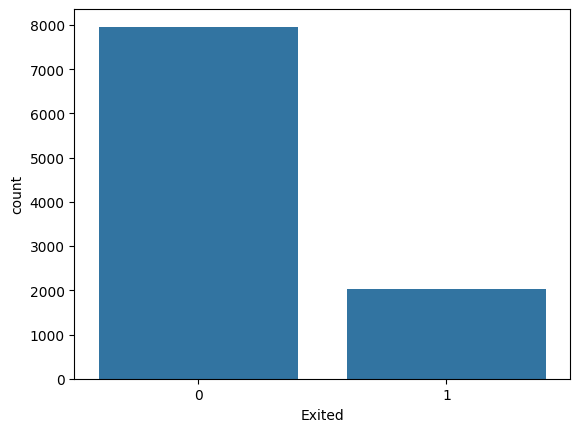

In [ ]:
# Checking if the regressor variable is biased or not using countplot
import seaborn as sns
sns.countplot(x='Exited',data=new_data)

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

X=new_data.drop('Exited',axis=1)
y=new_data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




# Logistic regression

In [ ]:
logistic_model = LogisticRegression()

# Train the model on the balanced training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions = logistic_model.predict(X_test)


# Print the classification report
report = classification_report(y_test, predictions)
print(report)


train_accuracy = logistic_model.score(X_train_resampled, y_train_resampled)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy:", test_accuracy)
print()
print()

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1607
           1       0.49      0.51      0.50       393

    accuracy                           0.80      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000

Training Accuracy: 0.8163939584644431
Testing Accuracy: 0.7995




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions,average='macro')
test_recall = recall_score(y_test, predictions,average='macro')
test_f1 = f1_score(y_test, predictions,average='macro')
results_df = pd.DataFrame ({
    'Metric':['Accuracy', 'Precision', 'Recal', 'F1_Score'],
    'Testing': [test_accuracy, test_precision, test_recall, test_f1]
})

results_df.T

,0,1,2,3
Metric,Accuracy,Precision,Recal,F1_Score
Testing,0.7995,0.684745,0.690697,0.687596


# (ROC) Receiver Operating Characteristic Curve

In [ ]:
y_prob = logistic_model.predict_proba(X_test)[:, 1]

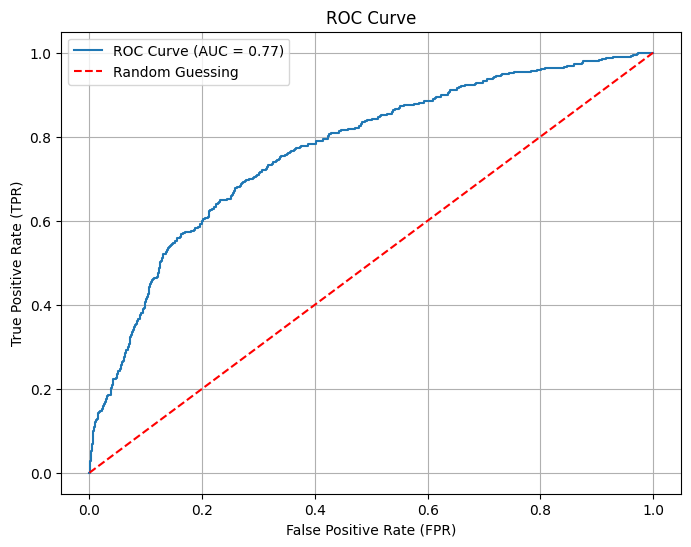

In [ ]:
# Calculate ROC curve and AUC score
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC(area under curve) score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Using Artificial Neural Network

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train model with class weights
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, class_weight=class_weights, callbacks=[early_stopping, reduce_lr])

# Evaluate model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f'Testing F1 Score: {f1}')


Epoch 1/100
250/250 [==============================] - 3s 6ms/step - loss: 0.7173 - accuracy: 0.5440 - val_loss: 0.6341 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6691 - accuracy: 0.6086 - val_loss: 0.6217 - val_accuracy: 0.6975 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.6342 - accuracy: 0.6407 - val_loss: 0.5524 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6189 - accuracy: 0.6680 - val_loss: 0.5613 - val_accuracy: 0.7190 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.6650 - val_loss: 0.5682 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5952 - accuracy: 0.6905 - val_loss: 0.5342 - val_accuracy: 0.7480 - lr: 0.0010
Epoch 7/100
250/250 [==============================] - 1s 3ms/st

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the training data
y_train_pred_proba = model.predict(X_train)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

# Make predictions on the testing data
y_test_pred_proba = model.predict(X_test)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Calculate training accuracy and F1 score
training_accuracy = accuracy_score(y_train, y_train_pred)
training_f1_score = f1_score(y_train, y_train_pred)

# Calculate testing accuracy and F1 score
testing_accuracy = accuracy_score(y_test, y_test_pred)
testing_f1_score = f1_score(y_test, y_test_pred)

print(f'Training Accuracy: {training_accuracy}')
print(f'Training F1 Score: {training_f1_score}')
print(f'Testing Accuracy: {testing_accuracy}')
print(f'Testing F1 Score: {testing_f1_score}')

63/63 [==============================] - 0s 2ms/step
Training Accuracy: 0.811625
Training F1 Score: 0.6001591934200053
Testing Accuracy: 0.816
Testing F1 Score: 0.5999999999999999


Based on the results from your ANN and logistic regression models, here are some key observations and conclusions:

### Artificial Neural Network (ANN) Model Results:
- **Training Accuracy**: 0.8116
- **Training F1 Score**: 0.6002
- **Testing Accuracy**: 0.816
- **Testing F1 Score**: 0.6000

### Logistic Regression Model Results:
- **Training Accuracy**: 0.8164
- **Testing Accuracy**: 0.7995
- **Testing Precision**: 0.6847
- **Testing Recall**: 0.6907
- **Testing F1 Score**: 0.6876

### Analysis and Conclusion:

1. **Model Performance on Training Data**:
   - The training accuracy of both models is relatively close, with the logistic regression model performing slightly better (0.8164) compared to the ANN model (0.8116).
   - The F1 score for the ANN model on the training data (0.6002) is significantly lower than that of the logistic regression model on the testing data (0.6876). This indicates that while the ANN has decent accuracy, its precision and recall balance may be weaker.

2. **Model Performance on Testing Data**:
   - The testing accuracy of the ANN model (0.816) is slightly higher than that of the logistic regression model (0.7995). This suggests that the ANN model might be better at generalizing to unseen data in terms of accuracy.
   - However, the testing F1 score for the ANN model (0.6000) is lower than that of the logistic regression model (0.6876). This indicates that the logistic regression model has a better balance of precision and recall on the testing data.

3. **Overfitting Analysis**:
   - The small difference between training and testing accuracies for both models suggests that neither model is severely overfitting.
   - The ANN model's F1 score is consistently lower on both training and testing data, indicating potential issues with the model's ability to correctly balance precision and recall.

4. **Precision and Recall Trade-offs**:
   - The logistic regression model shows better precision (0.6847) and recall (0.6907) on the testing data compared to the ANN model. This contributes to a higher F1 score, making it more reliable for applications where the balance of precision and recall is crucial.

### Conclusion:
- **Logistic Regression** appears to provide a more balanced performance with higher precision, recall, and F1 score on the testing data, despite having a slightly lower accuracy compared to the ANN model.
- **ANN Model** shows slightly better accuracy on the testing data but struggles with precision and recall balance, as evidenced by its lower F1 score.

Given these results, the logistic regression model may be more suitable for my application, especially if the balance of precision and recall (F1 score) is important. If you still prefer to use an ANN model, further tuning and possibly a more complex architecture, additional regularization, or enhanced data preprocessing might be necessary to improve its precision and recall.